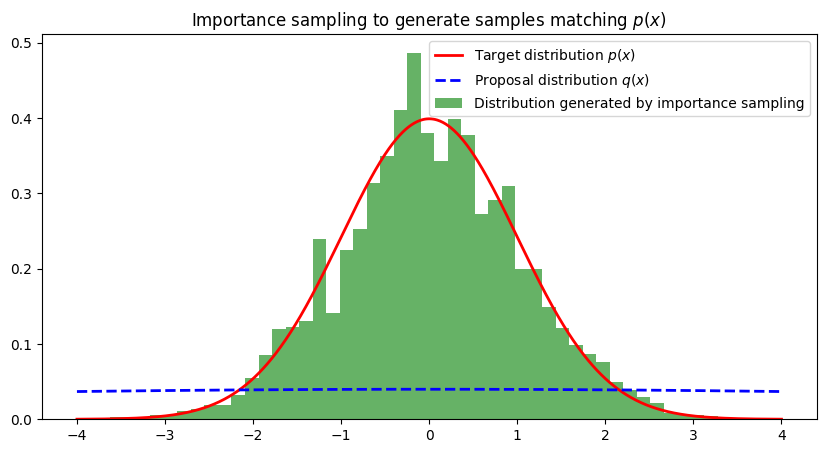

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Target distribution p(x) = N(0,1) standard normal distribution
def p_x(x):
    return norm.pdf(x, loc=0, scale=1)  # Standard normal distribution PDF

# Choose proposal distribution q(x) as N(0,2) (larger standard deviation to cover the target distribution)
proposal_mean = 0
proposal_std = 10

def q_x(x):
    return norm.pdf(x, loc=proposal_mean, scale=proposal_std)

# Perform importance sampling
N = 10000  # Number of samples
samples = np.random.normal(proposal_mean, proposal_std, N)  # Sample from q(x)
weights = p_x(samples) / q_x(samples)  # Calculate importance weights
weights /= np.sum(weights)  # Normalize weights to sum to 1

# Perform weighted resampling to make samples closer to the target distribution
resampled_indices = np.random.choice(np.arange(N), size=N, p=weights)
resampled_samples = samples[resampled_indices]

# Visualize the target distribution and the results of importance sampling
x_vals = np.linspace(-4, 4, 1000)
p_vals = p_x(x_vals)
q_vals = q_x(x_vals)

plt.figure(figsize=(10, 5))

# Plot the target distribution
plt.plot(x_vals, p_vals, label="Target distribution $p(x)$", linewidth=2, color="red")
# Plot the proposal distribution
plt.plot(x_vals, q_vals, label="Proposal distribution $q(x)$", linestyle="dashed", linewidth=2, color="blue")
# Plot the distribution of resampled samples
plt.hist(resampled_samples, bins=50, density=True, alpha=0.6, label="Distribution generated by importance sampling", color="green")

plt.legend()
plt.title("Importance sampling to generate samples matching $p(x)$")
plt.show()
